In [2]:
import numpy as np
import scipy as sp
import pymc3 as pm

import matplotlib.pyplot as plt

Mean: 4.0161
Var: 4.032840790000001


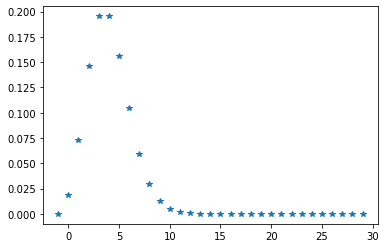

In [3]:
x = np.array(range(-1, 30))
lam=4
p_pmf = sp.stats.poisson.pmf(x, lam)
p_rvs = sp.stats.poisson.rvs(lam, size=10000)
print('Mean:', np.mean(p_rvs))
print('Var:', np.var(p_rvs))
plt.plot(x, p_pmf, '*');

Mean: 4.0151
Var: 7.19167199


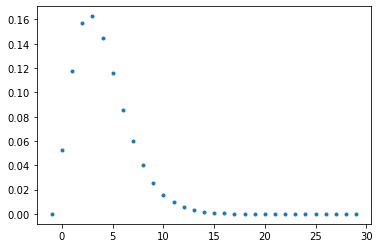

In [4]:
mu = 4
alpha = 5

n = alpha
p = alpha / (mu + alpha)

var = n * (1-p) / p**2

nb_pmf = sp.stats.nbinom.pmf(x, n, p)
nb_rvs = sp.stats.nbinom.rvs(n, p, size=10000)
print('Mean:', np.mean(nb_rvs))
print('Var:', np.var(nb_rvs))
plt.plot(x, nb_pmf, '.', color='C0');

In [5]:
v = np.var(nb_rvs)

1/((v/mu - 1) / mu)

5.0130464691016074

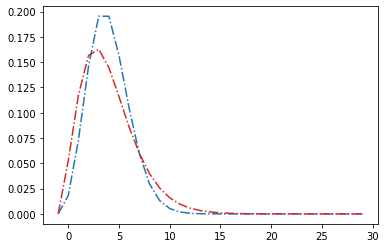

In [6]:
plt.plot(x, p_pmf, '-.', color='C0')
plt.plot(x, nb_pmf, '-.', color='C3')

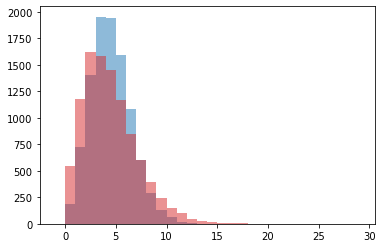

In [138]:
plt.hist(p_rvs, bins=x, alpha=0.5, color='C0');
plt.hist(nb_rvs, bins=x, alpha=0.5, color='C3');

In [8]:
with pm.Model() as m:
    lam = pm.Exponential('lam', lam=0.5)
    obs = pm.Poisson('obs', mu=lam, observed=p_rvs)
    
    samps = pm.sample(10000, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [lam]
Sampling chain 1, 0 divergences: 100%|██| 10500/10500 [00:16<00:00, 652.59it/s]
The acceptance probability does not match the target. It is 0.9054869141275458, but should be close to 0.8. Try to increase the number of tuning steps.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016CDF311D08>],
      dtype=object)

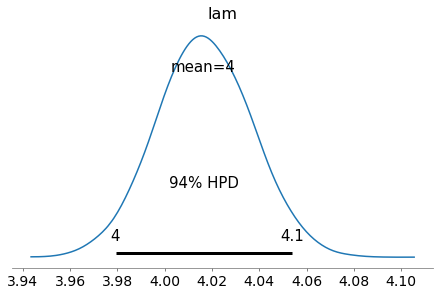

In [9]:
pm.plot_posterior(samps)

In [10]:
coin1 = help(sp.stats.binom.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwargs) method of scipy.stats._discrete_distns.binom_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    size : int or tuple of ints, optional
        Defining number of random variates (Default is 1).  Note that `size`
        has to be given as keyword, not as positional argument.
    random_state : {None, int, `~np.random.RandomState`, `~np.random.Generator`}, optional
        This parameter defines the object to use for drawing random
        variates.
        If `random_state` is `None` the `~np.random.RandomState` singleton
        is used.
        If `random_state` is an int, a new ``RandomState`` instance is used,
        seeded with random_

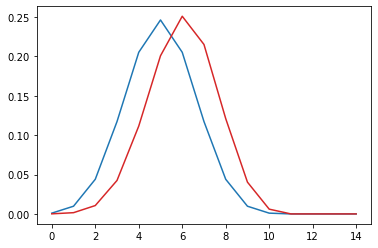

In [14]:
x = np.array(range(0, 15))
fair = sp.stats.binom.pmf(x, 10, 0.5)
bias = sp.stats.binom.pmf(x, 10, 0.6)

plt.plot(x, fair, color='C0')
plt.plot(x, bias, color='C3')

# Two coins, ten flips

In [85]:
rvs_fair = sp.stats.binom.rvs(1, 0.5, size=200, random_state=41)
rvs_bias = sp.stats.binom.rvs(1, 0.56, size=200, random_state=40)

print(sum(rvs_fair) / len(rvs_fair))
print(sum(rvs_bias) / len(rvs_bias))
print(np.mean(bin_bias), np.sqrt(np.var(bin_bias)))
print(np.mean(bin_fair), np.sqrt(np.var(bin_fair)))

0.45999999999999996


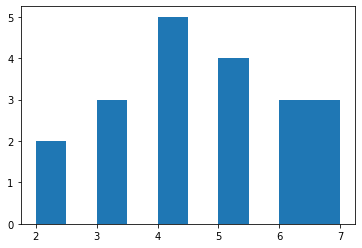

In [87]:
# Coin 1
n = 10
bin_fair = []
for i in range(0, len(rvs_fair), n):
    bin_fair.append(sum(rvs_fair[i:i+n]))
print(sum(bin_fair)/len(bin_fair)/10)
plt.hist(bin_fair);

In [88]:
with pm.Model() as m:
    #p = pm.Normal('flip_prob', mu=0.5, sigma=0.1)
    p = pm.Beta('flip_prob', alpha=5, beta=5)
    
    obs = pm.Binomial('flip_obs', n=10, p=p, observed=bin_fair)
    
    samps = pm.sample(30000, cores=1)

pm.plot_posterior(samps[1000:])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [flip_prob]
Sampling chain 1, 0 divergences: 100%|█| 30500/30500 [00:27<00:00, 1096.51it/s]


0.58


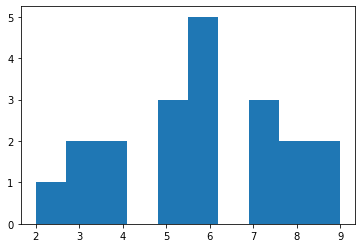

In [90]:
# Coin 2
n = 10
bin_bias = []
for i in range(0, len(rvs_bias), n):
    bin_bias.append(sum(rvs_bias[i:i+n]))
    
print(sum(bin_bias)/len(bin_bias)/10)
plt.hist(bin_bias);

In [91]:
with pm.Model() as m:
    #p = pm.Normal('flip_prob', mu=0.5, sigma=0.1)
    p = pm.Beta('flip_prob', alpha=5, beta=5)
    
    obs = pm.Binomial('flip_obs', n=10, p=p, observed=bin_bias)
    
    samps = pm.sample(30000, cores=1)
    
pm.plot_posterior(samps[1000:])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [flip_prob]
Sampling chain 1, 0 divergences: 100%|█| 30500/30500 [00:21<00:00, 1408.70it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016CE399EA48>],
      dtype=object)

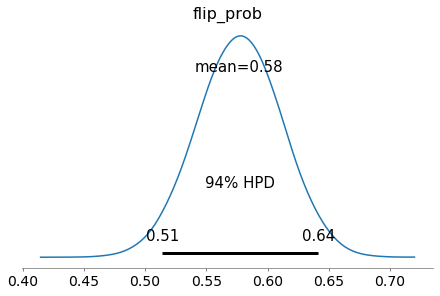

In [137]:
# Record data file
with open('2coins_10flips.txt', 'w') as f:
    f.write("Context: Two coins are flipped and (in chunks of 10 flips) the number of heads are summed.\n")
    f.write("Question: Is it likely that one or both of the coins is loaded? If so, which ones?\n")
    f.write('Coin 1:\n')
    f.write(','.join([str(i) for i in bin_fair]) + '\n')
    f.write('Coin 2:\n')
    f.write(','.join([str(i) for i in bin_bias]) + '\n')

# Two coins, unknown flips

In [129]:
s=42
rvs1 = sp.stats.binom.rvs(1, 0.35, size=1000, random_state=s)
rvs2 = sp.stats.binom.rvs(1, 0.65, size=500, random_state=s+1)

print(sum(rvs1) / len(rvs1))
print(sum(rvs2) / len(rvs2))
print(np.mean(rvs1), np.sqrt(np.var(rvs1)))
print(np.mean(rvs2), np.sqrt(np.var(rvs2)))


0.329
0.636
0.329 0.46984997605618756
0.636 0.481148625686492


3.29
3.18


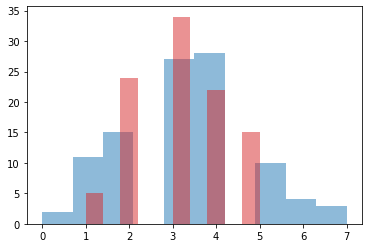

In [130]:
n1 = 10
n2 = 5

bins1 = []
bins2 = []
for i in range(0, len(rvs1), n1):
    bins1.append(sum(rvs1[i:i+n1]))
    
for i in range(0, len(rvs2), n2):
    bins2.append(sum(rvs2[i:i+n2]))

print(np.mean(bins1))
print(np.mean(bins2))

plt.hist(bins1, alpha=0.5, color='C0');
plt.hist(bins2, alpha=0.5, color='C3');


Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [num]
>NUTS: [flip_prob]
Sampling chain 1, 0 divergences: 100%|██| 10500/10500 [00:11<00:00, 944.41it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


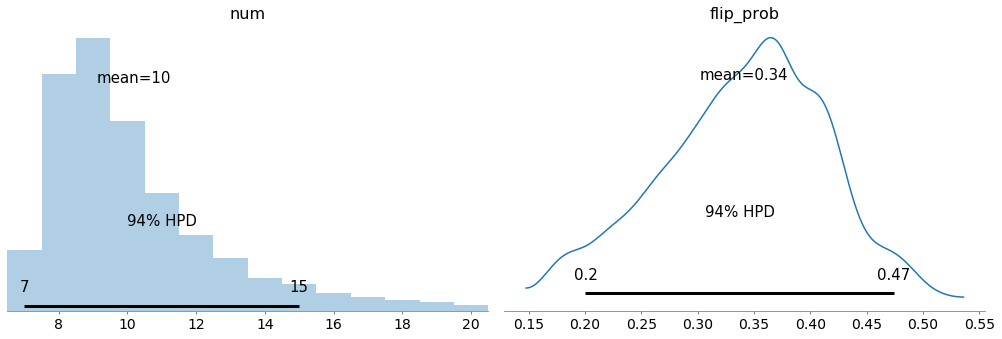

In [131]:
with pm.Model() as m:
    n = pm.DiscreteUniform('num', lower=0, upper=20)
    p = pm.Beta('flip_prob', alpha=5, beta=5)
    
    obs = pm.Binomial('flip_obs', n=n, p=p, observed=bins1)
    
    samps = pm.sample(30000, cores=1)
    
pm.plot_posterior(samps[1000:]);

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [num]
>NUTS: [flip_prob]
Sampling chain 1, 0 divergences: 100%|██| 30500/30500 [00:36<00:00, 825.58it/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4638021241622512, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.47264856668668004, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


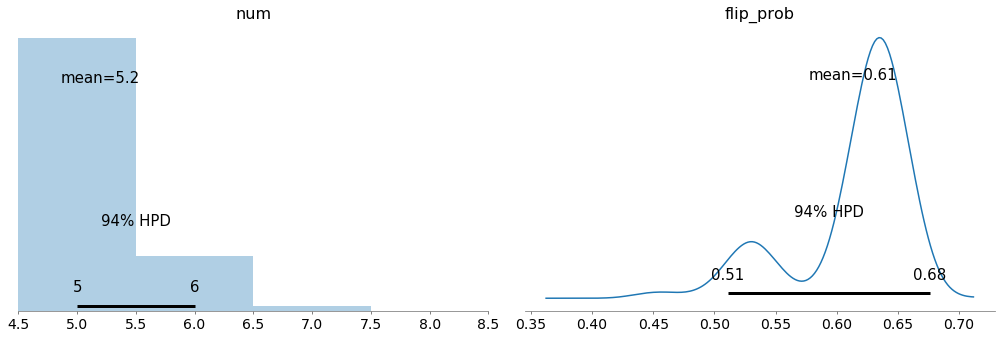

In [133]:
with pm.Model() as m:
    n = pm.DiscreteUniform('num', lower=0, upper=20)
    p = pm.Beta('flip_prob', alpha=5, beta=5)
    
    obs = pm.Binomial('flip_obs', n=n, p=p, observed=bins2)
    
    samps = pm.sample(30000, cores=1)
    
pm.plot_posterior(samps[1000:]);

In [138]:
# Record data file
with open('2coins_Nflips.txt', 'w') as f:
    f.write("Context: Two coins are flipped and the number of heads are summed in chunks of unknown size.\n")
    f.write("Question 1: Is it likely that one or both of the coins is loaded? If so, which ones and by how much?\n")
    f.write("Question 2: How many coin flips were binned together for each coin?\n")
    f.write('Coin 1:\n')
    f.write(','.join([str(i) for i in bins1]) + '\n')
    f.write('Coin 2:\n')
    f.write(','.join([str(i) for i in bins2]) + '\n')